


# DEPARTAMENTO DE ANÁLISES - ZUBER!

# Introdução

Esse projeto tem objetivo de explorar dados de viagens da empresa ZUBER e testar a seguinte hipótese:
#
    - A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

## Observação

Esse projeto foi elaborado em outra plataforma usando a linguagem `SQL` para leitura de dados direto do banco de dados e importação dos mesmos para esse notebook. Os códigos SQL usados anteriormente estarão ``ao final`` deste notebook para mostrar o desenvolvimento do projeto desde o seu início.

# Importando as Bibliotecas

In [27]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image, display

## Etapa 1. Carregando e corrigindo os dados

**Lendo os arquivos do banco de dados:**

In [28]:
df_trips_amounts = pd.read_csv('moved_project_sql_result_01.csv')
df_nbhood = pd.read_csv('moved_project_sql_result_04.csv')
df_wconditions = pd.read_csv('moved_project_sql_result_07.csv')

### DataFrame `trips`

In [29]:
df_trips_amounts.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [30]:
df_trips_amounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### DataFrame `Neibourhoods`

In [31]:
df_nbhood.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [32]:
df_nbhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


**Corrigindo os dados para números inteiros:**

In [33]:
df_nbhood['average_trips'] = df_nbhood['average_trips'].astype('int')
df_nbhood

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


### DataFrame `Weather`

In [34]:
df_wconditions.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [35]:
df_wconditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


**Corrigindo os dados para números inteiros:**

In [36]:
df_wconditions['duration_seconds'] = df_wconditions['duration_seconds'].astype('int')
df_wconditions['duration_seconds'].dtype

dtype('int32')

**Separando Data e Hora em diferentes colunas:**

In [37]:
df_wconditions['start_ts'] = pd.to_datetime(df_wconditions['start_ts'])
df_wconditions['date'] = df_wconditions['start_ts'].dt.date
df_wconditions['time'] = df_wconditions['start_ts'].dt.time
df_wconditions

,start_ts,weather_conditions,duration_seconds,date,time
0,2017-11-25 16:00:00,Good,2410,2017-11-25,16:00:00
1,2017-11-25 14:00:00,Good,1920,2017-11-25,14:00:00
2,2017-11-25 12:00:00,Good,1543,2017-11-25,12:00:00
3,2017-11-04 10:00:00,Good,2512,2017-11-04,10:00:00
4,2017-11-11 07:00:00,Good,1440,2017-11-11,07:00:00
...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0,2017-11-25,11:00:00
1064,2017-11-11 10:00:00,Good,1318,2017-11-11,10:00:00
1065,2017-11-11 13:00:00,Good,2100,2017-11-11,13:00:00
1066,2017-11-11 08:00:00,Good,1380,2017-11-11,08:00:00


## Conclusões

Pudemos notar o seguinte problema:
- Dois DataFrames se encontravam com dados incorretos em relação ao seu formato e foram prontamente corrigidos.

## Etapa 2. Análise Exploratória de dados

**Identificando os 10 princiapis bairros em termos de destinos:**

In [38]:
df_nbhood_head10 = df_nbhood.head(10)
df_nbhood_head10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


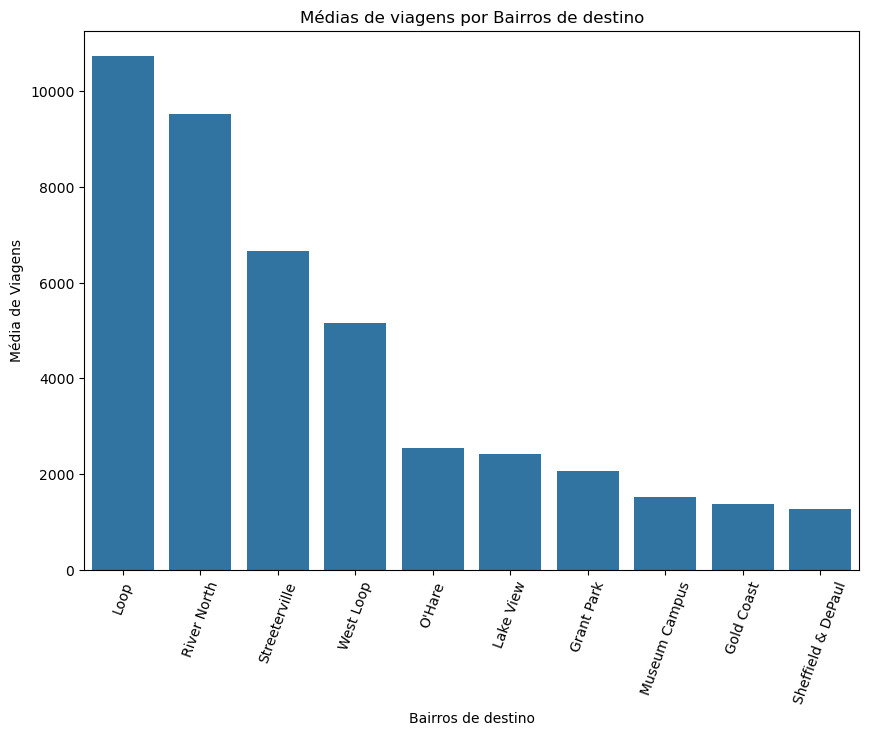

In [39]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_nbhood_head10, x='dropoff_location_name', y='average_trips')
plt.xticks(rotation=70)
plt.title('Médias de viagens por Bairros de destino')
plt.xlabel("Bairros de destino")
plt.ylabel("Média de Viagens");

<span style="color:green;">Como podemos notar graficamente, principalmente os bairros "Loop", "River North" e "Streeterville", dentre os demais em Chicago, se destacam em relação ao destino final dos usuários do serviço de táxi em Novembro de 2017.</span>

**Identificando os 10 princiapis empresas em termos de quantidade de corridas:**

In [40]:
df_trips_head10 = df_trips_amounts.head(10)
df_trips_head10

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


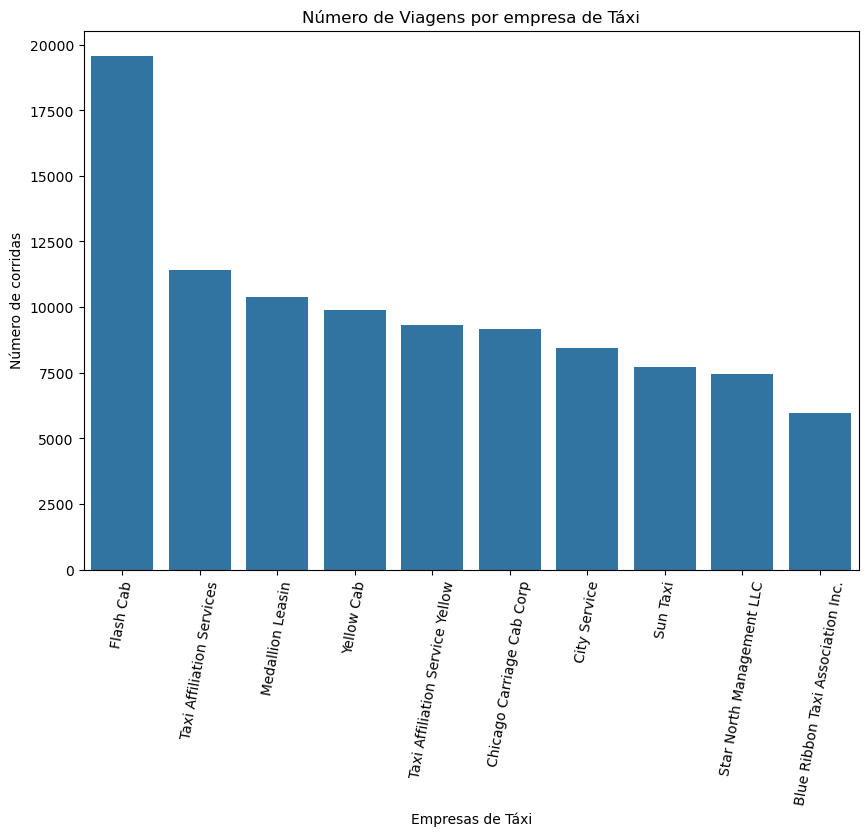

In [41]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_trips_head10, x='company_name', y='trips_amount')
plt.xticks(rotation=80)
plt.title('Número de Viagens por empresa de Táxi')
plt.xlabel("Empresas de Táxi")
plt.ylabel("Número de corridas");

<span style="color:green;">Como podemos notar graficamente, a empresa de táxi "Flash Cab" está liderando com folga a preferência dos usuários com uma média de quase 20.000 viagens. Esses dados de 15 a 16 Novembro de 2017 corroboram a grande distância para as suas concorrentes que se veem parelhas na preferência dos mesmos. </span>

## Etapa 3. Teste de Hipótese

-	`Hipótese` - A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

In [42]:
df_wconditions.head()

,start_ts,weather_conditions,duration_seconds,date,time
0,2017-11-25 16:00:00,Good,2410,2017-11-25,16:00:00
1,2017-11-25 14:00:00,Good,1920,2017-11-25,14:00:00
2,2017-11-25 12:00:00,Good,1543,2017-11-25,12:00:00
3,2017-11-04 10:00:00,Good,2512,2017-11-04,10:00:00
4,2017-11-11 07:00:00,Good,1440,2017-11-11,07:00:00


## Testando a `Hipótese`:

In [43]:
good_weather = df_wconditions.loc[df_wconditions['weather_conditions'] == "Good", 'duration_seconds']
bad_weather = df_wconditions.loc[df_wconditions['weather_conditions'] == "Bad", 'duration_seconds']

**Calculando a variância de ambas as condições de tempo:**

In [44]:
good_weather.var(), bad_weather.var()

(576382.0096895089, 520294.08600248274)

**Formulando as `Hipóteses`:**

`Hipótese Nula`: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare `"NÃO"` muda nos sábados chuvosos.

`Hipótese Alternativa`: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

In [45]:
alpha = 0.05
results = st.ttest_ind(good_weather, bad_weather, equal_var=False)
print('valor-p: ', results.pvalue)
if (results.pvalue < alpha):
    print('Rejeitamos a hipóstese nula')
else:
    print('Não Rejeitamos a hipóstese nula')

valor-p:  6.738994326108734e-12
Rejeitamos a hipóstese nula


<span style="color:green;">Iremos rejeitar a hipótese nula, uma vez que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.</span>

## Conclusões

Sobre o Teste de Hipótese:
- Os dados escolhidos para o teste foram a duração média em segundos da viagem do bairro "Loop" para o Aeroporto Internacional O'Hare em relação as condições climáticas.
- Como citado acima, esses dados foram escolhidos porque pudemos separar a duração da viagem em relação as condições climáticas e calcular a variância de cada variável e usar os dados para o teste.
- o Alpha difinido para o teste foi de "0.05".
- A hipótese Nula declara que não há relação entre os fenômenos de duração das corridas em relação as condições climáticas e já a Hipotése Alternativa afirma que existe sim essa relação. Por fim, o teste concluiu que há uma relação entre esses dois fenômenos e, por conseguinte, rejeitamos a hipótese nula.

# Conclusão geral

    - Podemos concluir que:
        A empresa de táxi "Flash cub" está dominante em relação a preferência dos usuários para viagens em Chicago entre os dias 15 e 16 de Novembro de 2017.
        Os bairros "Loop", "River North" e "Streeterville" em Chicago foram os 3 mais escolhidos como destino final de viagens de Táxi em Novembro de 2017.
        Por fim, e não menos importante, o teste de hipótese realizado reafirmou a hipótese de que "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos".
        

# CÓDIGOS SQL
        

In [46]:
import requests
from bs4 import BeautifulSoup

URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')

table = soup.find('table', attrs={"id": "weather_records"})


heading_table = []
for row in table.find_all('th'):
    heading_table.append(row.text)


content = []
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])


weather_records = pd.DataFrame(content, columns=heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


<span style="color:green;">Ainda utilizando python, o método request foi chamado para ler dados em uma URL e a transformação dos mesmos em um DataFrame.</span>

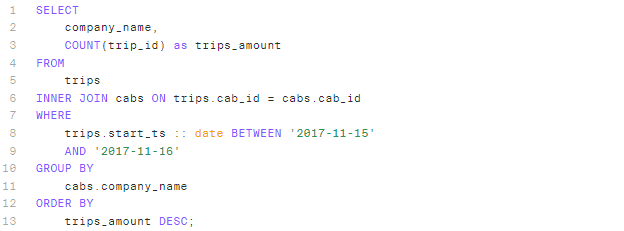

In [47]:
display(Image(filename='1codigo.PNG'))

<span style="color:green;">Já utilizando SQL, fizemos as seguintes consultas:
- Utilizando ``SELECT`` para seleciona a coluna "company_name"
- Utilizando o método ``COUNT`` para a coluna trip_id e modificando o nome da coluna para "trips_amount"
- Realizando uma junção entre os conjuntos de dados "trips" e "cabs" usando a coluna "cab_id"
- Utilizando ``WHERE`` para inserir uma condição de datas e para isso utilizando ``BETWEEN`` para limitar o conjunto de dados de acordo com o período estudado
- Agrupando os dados pela coluna "company_name" do conjunto de dados "cabs"
- Por fim, Ordenando os dados de forma decrescente pela coluna criada no código "trips_amount".</span>

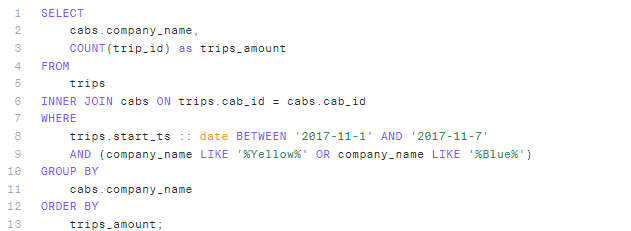

In [48]:
display(Image(filename='2codigo.PNG'))

<span style="color:green;">Utilizando SQL, fizemos as seguintes consultas:
- Diferente do 1º código, neste código, utilizando ``WHERE``, adicionamos uma nova condição LIKE para selecionar somente as empresas que tinha em seu nome as strings "Yellow" ou "Blue".</span>

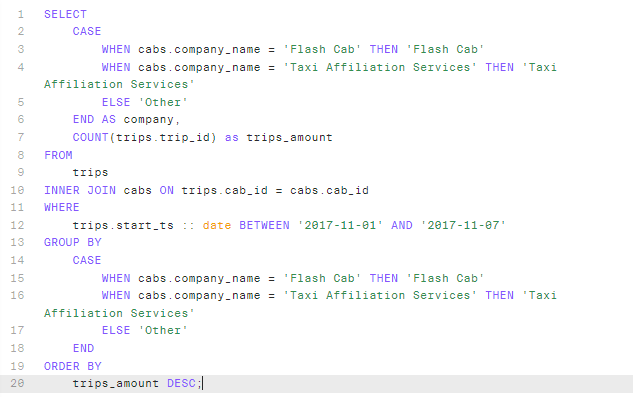

In [49]:
display(Image(filename='3codigo.PNG'))

<span style="color:green;">Utilizando SQL, fizemos as seguintes consultas:
- Neste caso acima utilizando ``CASE`` e ``WHEN`` para selecionar as empresas "Flash cab" e "Taxi Affiliation Services" e ``OTHER`` para todas as outras empresas de táxi e renomeando a coluna final como "company"
- Agrupando os dados nas mesmas condições que usamos no método ``SELECT``.</span>

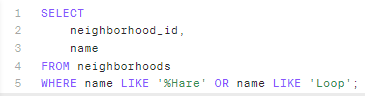

In [50]:
display(Image(filename='4codigo.PNG'))

<span style="color:green;">Utilizando SQL, fizemos as seguintes consultas:
- Utilizando ``SELECT`` para selecionar as colunas "neighborhood_id" e "name" e utilizando ``FROM`` para indicar o conjunto de dados "neighborhoods"
- Utilizando ``WHERE`` e ``LIKE`` em seguida para estabelecer uma condição onde o nome dos bairros contenham a string "Hare" ou "Loop".</span>

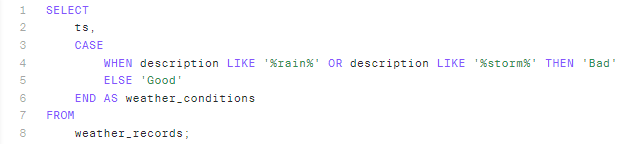

In [51]:
display(Image(filename='5codigo.PNG'))

<span style="color:green;">Utilizando SQL, fizemos as seguintes consultas:
- Utilizando ``SELECT`` para selecionar a coluna "ts" e
- Neste caso acima utilizando ``CASE`` e ``WHEN`` para dividir todas as horas em dois grupos: `Bad` se o campo descrição contiver as palavras `rain` ou `storm` e `Good` para as demais descrições
- Por fim, nomeando a coluna resultante como "weather_conditions" e ``FROM`` para utilizar o conjunto de dados "weather_records".</span>

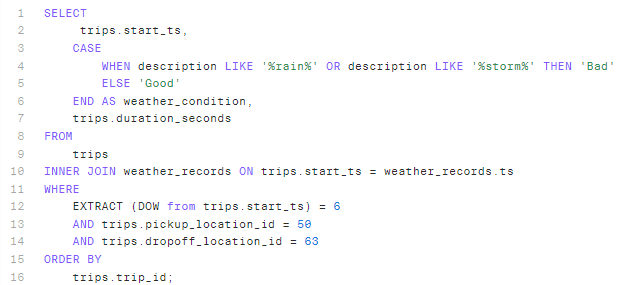

In [52]:
display(Image(filename='6codigo.PNG'))

<span style="color:green;">Utilizando SQL, fizemos as seguintes consultas:
- Utilizando ``SELECT`` para selecionar a coluna "start_ts" e "duration_seconds"
- Neste caso acima utilizando ``CASE`` e ``WHEN`` para dividir todas as horas em dois grupos: `Bad` se o campo descrição contiver as palavras `rain` ou `storm` e `Good` para as demais descrições
- Realizando uma junção entre os conjuntos de dados "trips" e "weather_records" usando a coluna "ts"
- Utilizando `WHEN` para estabelecer as seguintes condições: utlizando `EXTRACT + DOW` para selecionar o dia da semana ``6`` que seria somente aos ``Sábados``, também utilizando a condição das colunas serem especificamente os IDs "50" e "60"
- Por fim, ordenando os dados pela coluna "trip_id".</span>